In [24]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import pickle
from matplotlib import pyplot as plt 

In [70]:
word_imports_file = '../results/word_importances/qual_LABEL_5.pkl'
with open(word_imports_file, 'rb') as f:
    word_imports = pickle.load(f)

In [71]:
word_scores = {k : {'mean': np.mean(v), 'std': np.std(v), 'count': len(v)} for k, v in word_imports.items()}
word_scores = pd.DataFrame(word_scores).T
word_scores = word_scores.sort_values('mean')
# word_scores = word_scores.reset_index().rename({'index': 'word'}, axis=1)
# word_scores.index = word_scores.index.str.replace('##', '-', regex=False)
# word_scores.loc[:, 'word'] = word_scores['word'].str.replace('##', '-', regex=False)

In [72]:
def gen_wc_from_scores(word_scores, max_words=500, positive=True, 
    count_thresh=10, width=800, height=400, figwidth=10, figheight=5, 
    background_color='white', colormap='Reds',
    exclude_partwords=True):
    wc = WordCloud(max_words=500, background_color=background_color, colormap=colormap, width=width, height=height)
    if exclude_partwords:
        word_scores = word_scores[~word_scores.index.str.contains('##')]
    wc.generate_from_frequencies(
        word_scores[
            (word_scores['count'] >= count_thresh) &
            ((word_scores['mean'] >= 0) if positive else (word_scores['mean'] < 0))
        ]['mean'].abs().to_dict()
    )

    plt.figure(figsize=(figwidth, figheight))
    plt.imshow(wc)
    plt.axis('off')

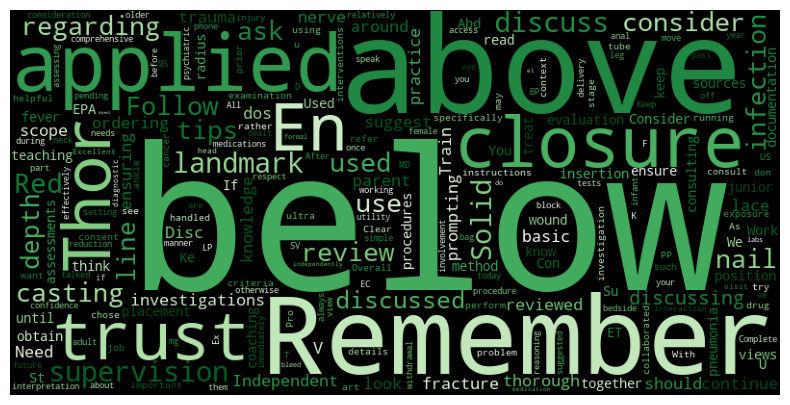

In [79]:
gen_wc_from_scores(word_scores, colormap='Greens', background_color='black', count_thresh=10)

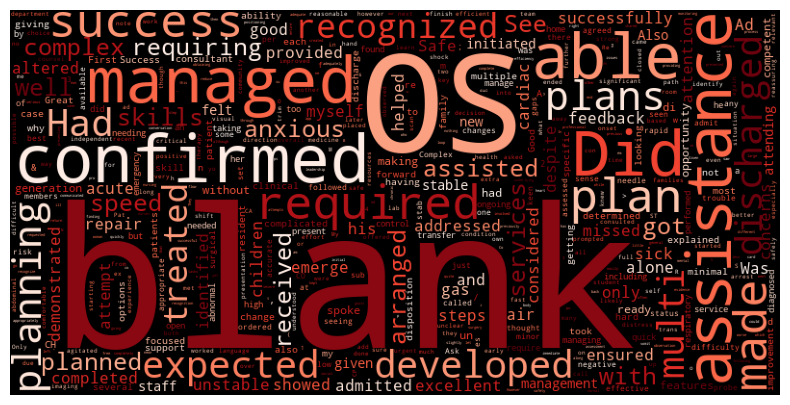

In [74]:
gen_wc_from_scores(word_scores, positive=False, colormap='Reds', background_color='black', count_thresh=10)